In [23]:
# Setup

In [18]:
!conda install praw -y

Solving environment: done

# All requested packages already installed.



In [19]:
!conda install python-dotenv -y

Solving environment: done

# All requested packages already installed.



In [1]:
import numpy as np
import pandas as pd
import os

SEED = 0
np.random.seed(SEED)
# pd.options.display.max_rows = 4000

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

# Collect Data

In [22]:
import praw

reddit = praw.Reddit(client_id=os.getenv("CLIENT_ID"),
                     client_secret=os.getenv("CLIENT_SECRET"),
                     user_agent=os.getenv("USER_AGENT"))

whatsthisbug = reddit.subreddit("whatsthisbug")

Version 7.0.0 of praw is outdated. Version 7.1.0 was released Tuesday June 23, 2020.


In [23]:
from typing import List, Iterable


def deep_flatten(iterable: Iterable) -> Iterable:
    """Returns a flattened version of iterable

    Bonus 3: Accept all iterables, including strings
    >>> list(deep_flatten([['apple', 'pickle'], ['pear', 'avocado']]))
    ['apple', 'pickle', 'pear', 'avocado']
    """
    flattened_list = []
    for elem in iterable:
        if isinstance(elem, str):
            flattened_list.append(elem)
        else:
            try:
                flattened_list.extend(deep_flatten(elem))
            except TypeError:
                flattened_list.append(elem)

    return flattened_list

def get_all_comments(cf) -> List:
    top_level_comments = [c.body for c in cf]
    replies = [get_all_comments(c.replies) for c in cf]
    all_comments = top_level_comments + replies

    return all_comments


Unless you've disabled/hidden output, the results of the cell will be long!  
Removed batbugs cuz there weren't enough samples on the subreddit (could just be that the difference is too difficult to tell from low resolution photos, by relative novices)

In [36]:
from pathlib import Path


data = {}
for post in whatsthisbug.search("bedbug", limit=250):
    # concat comments
    comment_forest = post.comments
    comments = deep_flatten(get_all_comments(comment_forest))
    response = ' '.join(comments)

    # label by comments
#     if any(word in response for word in ["batbug", "bat bug"]):
#         label = "batbug"
    if any(word in response for word in ["booklice", "book lice",
                                           "booklouse", "book louse"]):
        label = "booklice"
    elif any(word in response for word in ["carpetbeetle", 
                                           "carpet beetle"]):
        label = "carpetbeetle"
    elif any(word in response for word in ["spiderbeetle",
                                           "spider beetle"]):
        label = "spiderbeetle"
    elif any(word in response for word in ["stinkbug", "stink bug"]):
        label = "stinkbug"
    else:
        doppelgangers = ["cockroach", "beetle", "flea", 
                         "tick", "mite", "spider"]
        for d in doppelgangers:
            if d in response:
                label = d
                break
        else:
            if "bedbug" in response:
                label = "bedbug"
            else:
                label = "other"

    # download photo  
    save_ext = Path(post.thumbnail).suffix
    save_path = f"data/{label}"
    !wget -c -P {save_path} {post.thumbnail}
    # !wget -c -P  {post.thumbnail}

    # save record
    link = f"https://reddit.com{post.permalink}"
    data[link] = (post.thumbnail, label)

data;

--2020-09-22 04:16:21--  https://a.thumbs.redditmedia.com/OGfG4SHe1EyeT7rDKwLfnbCQDY0r-Mt8DMSY_7XMpp0.jpg
Resolving a.thumbs.redditmedia.com (a.thumbs.redditmedia.com)... 151.101.1.140, 151.101.65.140, 151.101.129.140, ...
Connecting to a.thumbs.redditmedia.com (a.thumbs.redditmedia.com)|151.101.1.140|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2020-09-22 04:16:21--  https://b.thumbs.redditmedia.com/h1URteDXURsRexseKddhJrfmdzP-ULSrU0RwCCMhpik.jpg
Resolving b.thumbs.redditmedia.com (b.thumbs.redditmedia.com)... 151.101.1.140, 151.101.65.140, 151.101.129.140, ...
Connecting to b.thumbs.redditmedia.com (b.thumbs.redditmedia.com)|151.101.1.140|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2020-09-22 04:16:22--  http://default/
Resolving default (default)... failed: Name or service not known.
w

In [32]:
# to classify solely on bedbug/not bedbug
# !rsync -av --progress data/* data/not_bedbug --exclude bedbug;

sending incremental file list
created directory data/not_bedbug
bat/
bat/TaLT4retYFyuuBHFVl78fAN9BnBBbmTILNs2KUV27LE.jpg
          5,582 100%    0.00kB/s    0:00:00 (xfr#1, to-chk=34/45)
beetle/
beetle/9935MSFrYP2lsP27_FVbTN3rJbGKZXjPck8XBKC_b3c.jpg
          3,691 100%    3.52MB/s    0:00:00 (xfr#2, to-chk=33/45)
beetle/KqVPDUIB6WBBkScIs1qNJ8yldn2YhD_nYXx1blXrC9w.jpg
          5,607 100%    5.35MB/s    0:00:00 (xfr#3, to-chk=32/45)
beetle/M52GgUkOeKmBe21YV_LB7LCnIRDhL9R0pomwX2oPtrw.jpg
          6,388 100%    6.09MB/s    0:00:00 (xfr#4, to-chk=31/45)
beetle/NqiMt06LnDKmz6KchrsNYeJprkXZqdjgbIQ-KdBQtH8.jpg
          4,937 100%    4.71MB/s    0:00:00 (xfr#5, to-chk=30/45)
beetle/VOeMb4ke0g4gmztSCfdVmv3tQ3W1bmxoyujfPj54sAg.jpg
          6,445 100%    6.15MB/s    0:00:00 (xfr#6, to-chk=29/45)
beetle/WVQOWtbXPxVgaTmFAo-_trMODoxj2Quj-fP_G2m-iHk.jpg
          4,382 100%    4.18MB/s    0:00:00 (xfr#7, to-chk=28/45)
beetle/WrVLK0MwUjOZaKMFoueIJ8F3F9eLwEEuAwYO3cZ5WkA.jpg
          4,288 100%    

Use Azure image search to augment positive data class and other data classes with lower frequencies

In [9]:
bedbugs = search_images_bing(os.getenv("AZURE_IMAGE_SEARCH_KEY"), 
                             "bedbug")
bedbug_image_urls = bedbugs.attrgot("content_url")
len(bedbug_image_urls)

150

In [ ]:
bedbugs = search_images_bing(os.getenv("AZURE_IMAGE_SEARCH_KEY"), 
                             "bedbug")\
             .attrgot("content_url")
download_images("data/bedbug-azure", urls=bedbugs)

In [13]:
cockroachs = search_images_bing(os.getenv("AZURE_IMAGE_SEARCH_KEY"), 
                                "cockroach")\
             .attrgot("content_url")
download_images("data/cockroach-azure", urls=cockroachs)

In [14]:
fleas = search_images_bing(os.getenv("AZURE_IMAGE_SEARCH_KEY"), 
                           "flea")\
             .attrgot("content_url")
download_images("data/flea-azure", urls=fleas)

In [15]:
mites = search_images_bing(os.getenv("AZURE_IMAGE_SEARCH_KEY"), 
                           "mite")\
             .attrgot("content_url")
download_images("data/mite-azure", urls=mites)

In [16]:
booklice = search_images_bing(os.getenv("AZURE_IMAGE_SEARCH_KEY"), 
                              "booklice")\
             .attrgot("content_url")
download_images("data/booklice-azure", urls=booklice)

In [17]:
stinkbugs = search_images_bing(os.getenv("AZURE_IMAGE_SEARCH_KEY"), 
                               "stinkbug")\
             .attrgot("content_url")
download_images("data/stinkbug-azure", urls=stinkbugs)

In [18]:
ticks = search_images_bing(os.getenv("AZURE_IMAGE_SEARCH_KEY"), 
                            "tick")\
             .attrgot("content_url")
download_images("data/tick-azure", urls=ticks)

# Train Model

In [4]:
from fastbook import *
from pathlib import Path

In [71]:
bugs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [72]:
path = Path("data")
dls = bugs.dataloaders(path)

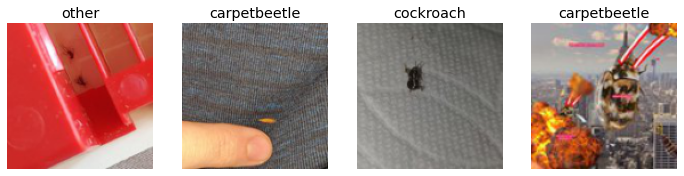

In [73]:
dls.valid.show_batch(max_n=4, nrows=1)

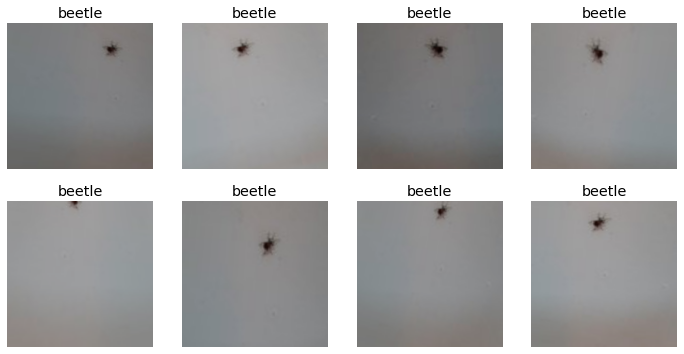

In [74]:
bugs = bugs.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                batch_tfms=aug_transforms())
dls = bugs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [75]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.135553,6.328050,0.913043,00:01


epoch,train_loss,valid_loss,error_rate,time
0,3.611554,4.394554,0.913043,00:02
1,3.476250,3.633665,0.891304,00:02
2,3.303419,3.411623,0.934783,00:02
3,3.162207,3.316617,0.934783,00:02


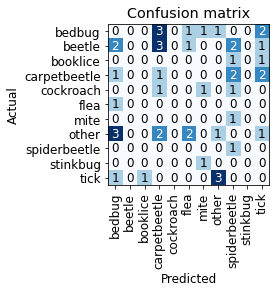

In [76]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

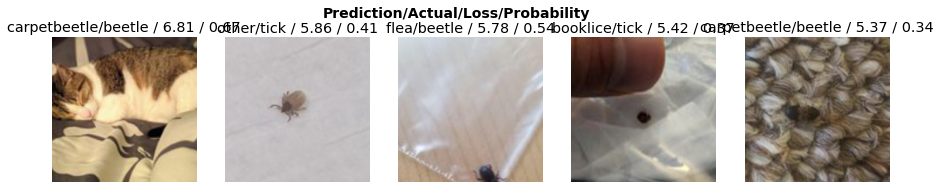

In [77]:
interp.plot_top_losses(5, nrows=1)

In [5]:
from fastai.vision.widgets import *
import shutil

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [60]:
for idx in cleaner.delete(): 
    cleaner.fns[idx].unlink()
    
for idx,cat in cleaner.change(): 
    shutil.move(str(cleaner.fns[idx]), path/cat)